# Question1

In [150]:
import pandas as pd
import numpy as np

In [151]:
df = pd.read_csv("data.csv")

In [152]:
df = df[['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity']]

In [153]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [154]:
df = df.fillna(0)

In [155]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [156]:
df['rooms_per_household'] = df.total_rooms / df.households
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms
df['population_per_household'] = df.population / df.households

In [157]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [158]:
#What is the most frequent observation (mode) for the column ocean_proximity?
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [159]:
df['above_average'] = (df.median_house_value > df.median_house_value.mean()).reset_index(drop= True)
df['above_average'] = df['above_average'].astype(int)
df['above_average']

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: above_average, Length: 20640, dtype: int64

In [160]:
df.head()
#del df['median_house_value']

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


# Question2

In [161]:
#split the data
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state = 42)

#delet index
df_train = df_train.reset_index(drop= True)
df_val = df_val.reset_index(drop= True)
df_test = df_test.reset_index(drop= True)

#y target
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

#del median_house_value
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [162]:
df.dtypes 

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
above_average                 int64
dtype: object

In [163]:
#Quesion 2 - households 
df_full_train[['households', 'total_rooms']].corrwith(df_full_train.total_bedrooms)

households     0.980255
total_rooms    0.930489
dtype: float64

In [164]:
df_full_train[['population']].corrwith(df_full_train.households)

population    0.907452
dtype: float64

In [165]:
df_full_train[['population_per_household']].corrwith(df_full_train.total_rooms)

population_per_household   -0.024991
dtype: float64

In [166]:
numerical = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households',
             'median_income','rooms_per_household','bedrooms_per_room','population_per_household','above_average']

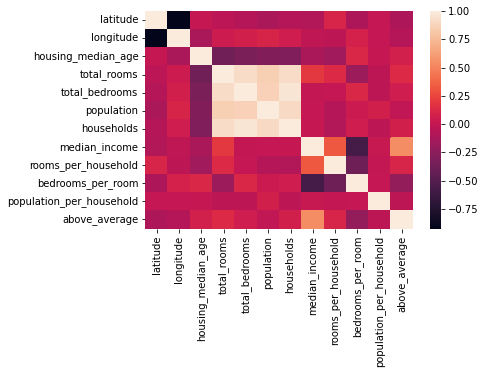

In [167]:
import seaborn as sns
corr = df[numerical].corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Question3

In [168]:
df_train.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [169]:
categorical = ['ocean_proximity']         

In [170]:
from sklearn.metrics import mutual_info_score

In [171]:
mtl = mutual_info_score(df.above_average, df.ocean_proximity)
mtl

0.10206817406620414

In [172]:
round(mtl, 2)

0.1

# Question 4

In [173]:
from sklearn.feature_extraction import DictVectorizer

In [174]:
df_train[['ocean_proximity']].iloc[:10]

,ocean_proximity
0,<1H OCEAN
1,NEAR OCEAN
2,INLAND
3,<1H OCEAN
4,NEAR OCEAN
5,NEAR OCEAN
6,<1H OCEAN
7,<1H OCEAN
8,<1H OCEAN
9,INLAND


In [175]:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

In [176]:
categorical = ['ocean_proximity']

In [177]:
train_dicts = df_train[temp+categorical].to_dict(orient='records')

In [178]:
train_dicts[0]

{'latitude': 34.43,
 'longitude': -119.67,
 'housing_median_age': 39.0,
 'total_bedrooms': 381.0,
 'total_rooms': 1467.0,
 'population': 1404.0,
 'median_income': 2.3681,
 'rooms_per_household': 3.9224598930481283,
 'bedrooms_per_room': 0.25971370143149286,
 'population_per_household': 3.7540106951871657,
 'ocean_proximity': '<1H OCEAN'}

In [179]:
dv = DictVectorizer(sparse=False)

In [180]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [181]:
dv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [182]:
list(dv.transform(train_dicts[:5]))

[array([ 2.59713701e-01,  3.90000000e+01,  3.44300000e+01, -1.19670000e+02,
         2.36810000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.40400000e+03,  3.75401070e+00,
         3.92245989e+00,  3.81000000e+02,  1.46700000e+03]),
 array([ 1.30227981e-01,  2.40000000e+01,  3.37400000e+01, -1.18320000e+02,
         1.01357000e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  2.24800000e+03,  2.78908189e+00,
         7.56451613e+00,  7.94000000e+02,  6.09700000e+03]),
 array([ 2.34624146e-01,  4.10000000e+01,  3.91300000e+01, -1.21620000e+02,
         1.67190000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  8.56000000e+02,  2.54005935e+00,
         3.90801187e+00,  3.09000000e+02,  1.31700000e+03]),
 array([ 1.94158437e-01,  9.00000000e+00,  3.42400000e+01, -1.18630000e+02,
         4.83330000e+00,  1.00000000e+00,  0.00000000e+00

In [183]:
dv = DictVectorizer(sparse=False)

In [184]:
X_train = dv.fit_transform(train_dicts)

In [185]:
val_dicts =  df_val.to_dict(orient='records')

In [186]:
X_val = dv.transform(val_dicts)

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)


In [189]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [190]:
y_pred = model.predict_proba(X_val)[:,1]

In [191]:
#people could hestaited
price_decision = (y_pred >=0.5)

In [192]:
price_decision.astype(int)

array([0, 0, 1, ..., 1, 1, 0])

In [193]:
#how many proc match - 0.84
round((y_val == price_decision).mean(),4)

0.8333

# Question 5

In [194]:
#ours coef.
model.coef_[0].round(3)

array([ 1.300e-01,  3.600e-02,  1.280e-01,  8.700e-02,  1.271e+00,
        4.630e-01, -1.724e+00,  1.600e-02,  2.940e-01,  8.710e-01,
       -1.000e-03,  7.000e-03, -1.350e-01,  4.000e-03, -0.000e+00])

In [195]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'bedrooms_per_room': 0.13,
 'housing_median_age': 0.036,
 'latitude': 0.128,
 'longitude': 0.087,
 'median_income': 1.271,
 'ocean_proximity=<1H OCEAN': 0.463,
 'ocean_proximity=INLAND': -1.724,
 'ocean_proximity=ISLAND': 0.016,
 'ocean_proximity=NEAR BAY': 0.294,
 'ocean_proximity=NEAR OCEAN': 0.871,
 'population': -0.001,
 'population_per_household': 0.007,
 'rooms_per_household': -0.135,
 'total_bedrooms': 0.004,
 'total_rooms': -0.0}

In [196]:
w0 =model.intercept_[0]
w0

-0.0792789788582124

In [197]:
w = model.coef_[0]
w.round(3)

array([ 1.300e-01,  3.600e-02,  1.280e-01,  8.700e-02,  1.271e+00,
        4.630e-01, -1.724e+00,  1.600e-02,  2.940e-01,  8.710e-01,
       -1.000e-03,  7.000e-03, -1.350e-01,  4.000e-03, -0.000e+00])

In [198]:
temp = ['latitude', 'longitude', 'housing_median_age',  'total_bedrooms','total_rooms','population', 'median_income',
'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

In [199]:
#now 0.84
#without total_rooms 0.84
#total_bedrooms 0.84
#0.83
#households 0.8333

# Question 6

In [200]:
a = [0, 0.01, 0.1, 1, 10]

In [201]:
dicts_full_train = df_full_train[categorical+numerical].to_dict(orient='records')

In [202]:
dicts_full_train[:3]

[{'ocean_proximity': 'NEAR OCEAN',
  'latitude': 32.71,
  'longitude': -117.03,
  'housing_median_age': 33.0,
  'total_rooms': 3126.0,
  'total_bedrooms': 627.0,
  'population': 2300.0,
  'households': 623.0,
  'median_income': 3.2596,
  'rooms_per_household': 5.017656500802568,
  'bedrooms_per_room': 0.20057581573896352,
  'population_per_household': 3.691813804173355},
 {'ocean_proximity': 'NEAR OCEAN',
  'latitude': 33.77,
  'longitude': -118.16,
  'housing_median_age': 49.0,
  'total_rooms': 3382.0,
  'total_bedrooms': 787.0,
  'population': 1314.0,
  'households': 756.0,
  'median_income': 3.8125,
  'rooms_per_household': 4.473544973544974,
  'bedrooms_per_room': 0.23270254287403902,
  'population_per_household': 1.7380952380952381},
 {'ocean_proximity': 'NEAR OCEAN',
  'latitude': 34.66,
  'longitude': -120.48,
  'housing_median_age': 4.0,
  'total_rooms': 1897.0,
  'total_bedrooms': 331.0,
  'population': 915.0,
  'households': 336.0,
  'median_income': 4.1563,
  'rooms_per_hous

In [203]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [204]:
df.median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [212]:
y_full_train = np.log1p(df_full_train.median_house_value).reset_index(drop= True).values
y_full_train

array([11.54249398, 12.85344025, 12.05873785, ..., 12.31088751,
       12.55497093, 12.69158354])

In [218]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [224]:
#Answer 0.1
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a,random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 8))

0 0.36449927
0.01 0.36449923
0.1 0.36449913
1 0.36451248
10 0.36465577


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.2583e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
